# Predicting Tesla Stocks

#### 1. Problem Definition
Looking at previous data, can we predict the adjusted close for the next 3 months?

#### 2. Data
Original data for the project was retrieved from Kaggle at

https://www.kaggle.com/datasets/varpit94/tesla-stock-data-updated-till-28jun2021


        

#### 3. Features
Following features in the 7 columns will be used to make predictions in this project. 
1. Date
2. Open : Price from the first transaction of a trading day
3. High: Maximum price in a trading day
4. Low: Minimum price in a trading day
5. Close: Price from the last transaction of a trading day
6. Adj Close: Closing price adjusted to reflect the value after accounting for any corporate actions      
7. Volume:Number of units traded in a day


#### 4. Modeling
Since pricing predictions will be made this project, following models will be used.
- RandomForestRegressor

#### 5. Experimentation
RandomizedSearchCV will be used for parameter tuning and further experimenation of this project.



### Tools for the Project

In [59]:
# Tools for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

# Models for the project
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn import linear_model

# Tools for evaluating
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

### Helper Functions

In [60]:
def plot_features(dataset, feature):
    '''
    Helps view how the features change with time.
    feature : The title of the column interested
    dataset = the dataset in question
    feature = feature/characteristic that is interested in visualized
    '''
    fig, ax = plt.subplots(figsize = (12,6))
    
    # Resetting the date column for plotting purposes
    ax.plot(dataset['Date'], dataset[feature])
    ax.set(title = f'Change in {feature} with Time',
            xlabel = 'Years', 
            ylabel = 'Amount');

    
def plot_multiples(feature1, feature2, dataset):
    '''
    Visualize multiple features in one plot for comparison.
    dataset = The interested dataset where the data is coming from.
    '''
    
    fig, ax1 = plt.subplots(figsize = (12,8))
    ax1.plot(dataset['Date'], dataset[feature1], color = 'blue', label = True)
    ax1.set(title = f'{feature1} and {feature2} Over Time')
    ax1.set_xlabel('Time')
    ax1.set_ylabel(f'{feature1} Counts')
    ax2 = ax1.twinx() # Instantiate a second axes that shares same axis
    ax2.plot(dataset['Date'], dataset[feature2], color = 'green', label = True)
    ax2.set_ylabel(f'{feature2} Counts')
    ax1.legend([feature1])
    ax2.legend([feature2]);


def plot_preds(n):
    '''
    Plotting the predictions on a given dataset
    n = starting row of the interested dataset. If the whole dataset is in question, n = 0
    '''
    plt.figure(figsize = (15,8))
    plt.plot(tesla_prices['Date'][n:], tesla_prices['Actual Adj Close'][n:], color = 'blue')
    plt.plot(tesla_prices['Date'][n:], tesla_prices['Original Predicted Adj Close'][n:], color = 'orange')
    plt.plot(tesla_prices['Date'][n:], tesla_prices['Predicted Best Adj Close'][n:], color = 'green')
    plt.legend(['Actual', 'Original', 'Supposably the Best']);
    


### Loading Data

In [61]:
tesla = pd.read_csv("Tesls Stock Project/TSLA.csv", 
                   parse_dates=['Date'])
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [62]:
# Checking datatypes
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2931 non-null   datetime64[ns]
 1   Open       2931 non-null   float64       
 2   High       2931 non-null   float64       
 3   Low        2931 non-null   float64       
 4   Close      2931 non-null   float64       
 5   Adj Close  2931 non-null   float64       
 6   Volume     2931 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 160.4 KB


In [63]:
# Checking for any missing values
tesla.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Visualize Adjusted Close by date

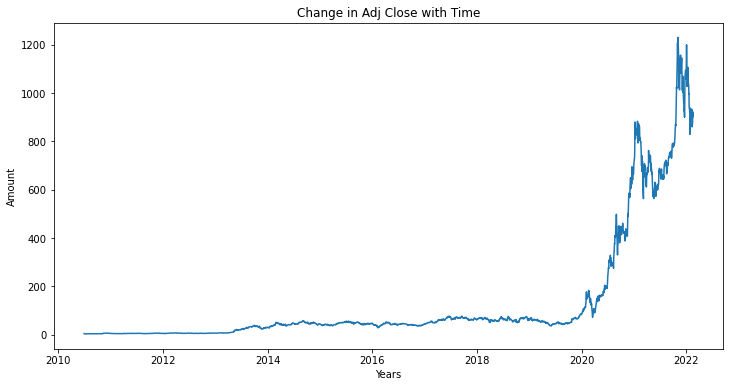

In [64]:
plot_features(tesla, 'Adj Close')

#### Sample The Data According to Months

In [65]:
# Set the 'Date' column as the index
tesla_m = tesla.set_index('Date')

# Sample the totals to the end of the month
tesla_m = tesla_m.resample('M').sum()

# Resetting the index
tesla_m.reset_index(inplace = True)
tesla_m.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,8.958,11.084,8.168,9.544,9.544,179767000
1,2010-07-31,84.308,86.688,79.028,82.144,82.144,322879000
2,2010-08-31,86.000,87.604,83.954,85.848,85.848,75191000
3,2010-09-30,87.272,89.360,85.298,87.110,87.110,90229500
4,2010-10-31,87.038,88.170,85.788,86.996,86.996,32739000


#### Visualize Feature Changes Over Time

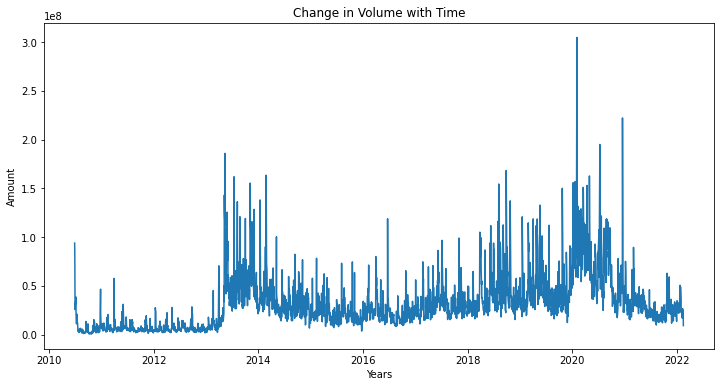

In [66]:
plot_features(tesla, 'Volume')

#### Volume of Sales for The Past 2 Years

In [67]:
tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2926,2022-02-10,908.369995,943.809998,896.700012,904.549988,904.549988,22042300
2927,2022-02-11,909.630005,915.960022,850.700012,860.000000,860.000000,26492700
2928,2022-02-14,861.570007,898.880005,853.150024,875.760010,875.760010,22515100
2929,2022-02-15,900.000000,923.000000,893.380005,922.429993,922.429993,19095400


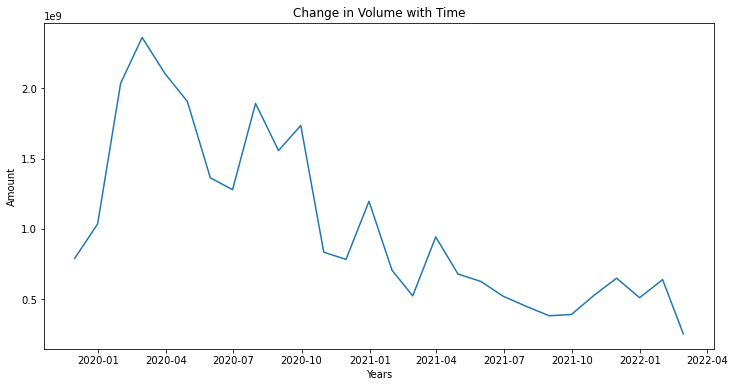

In [68]:
plot_features(tesla_m[113:], 'Volume')

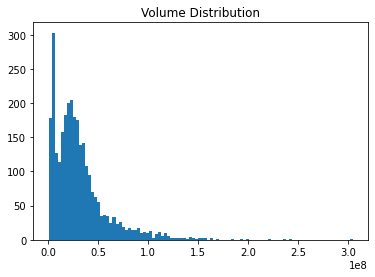

In [69]:
plt.hist(tesla['Volume'], bins = 100)
plt.title ("Volume Distribution");

**Note:** The 1st quarter of 2020 seem to have had the largest volume of sales for Tesla. 

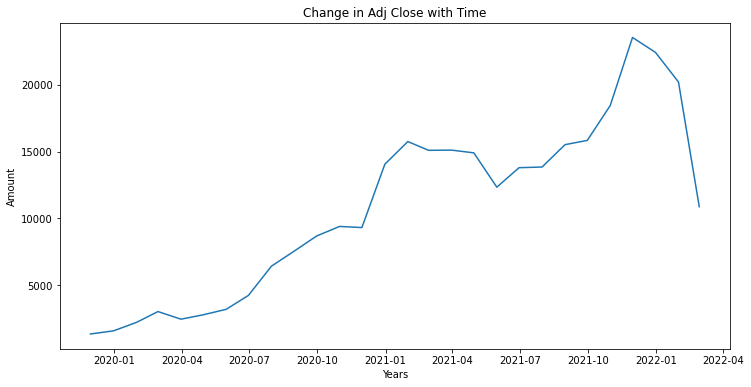

In [70]:
plot_features(tesla_m[113:], 'Adj Close')

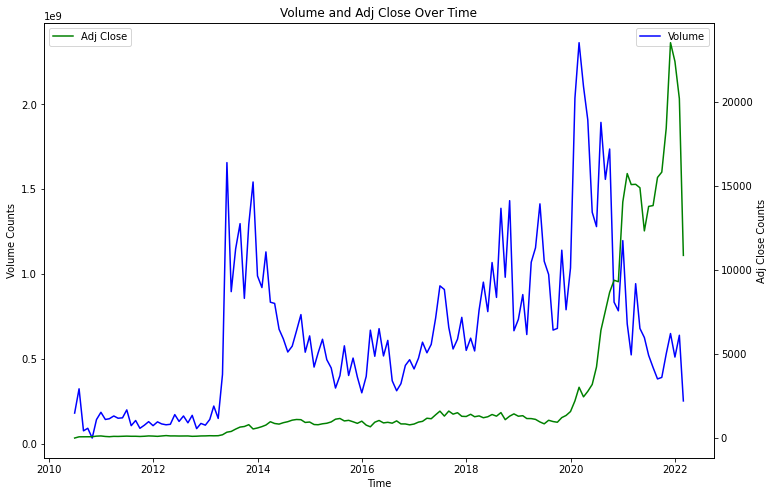

In [71]:
plot_multiples('Volume', 'Adj Close', tesla_m)

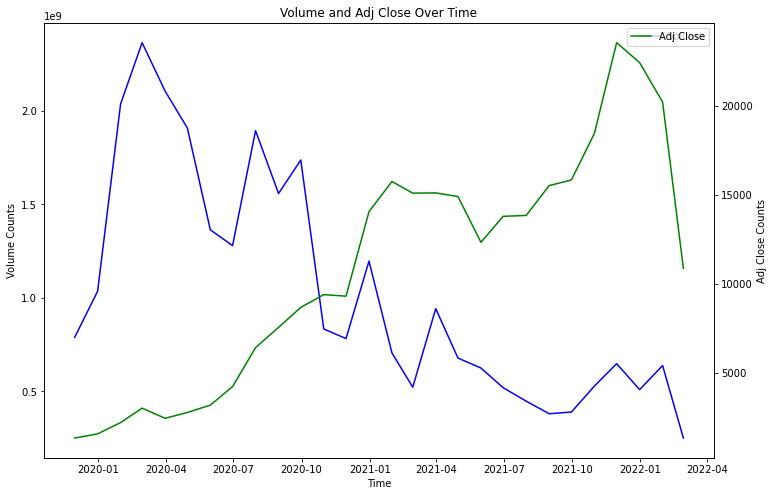

In [72]:
plot_multiples('Volume', 'Adj Close', tesla_m[113:])

**Note:** While the largest volume of sales occured at the beginning of 2020, the significant increase of adjusted closing price seems to have started around that time. And it is also observed that major peaks of stock prices occur around the beginning of the year to come down slightly till the mid of the year and increase back up to peak even higher at the end of the year leading to the beginning of the following year.

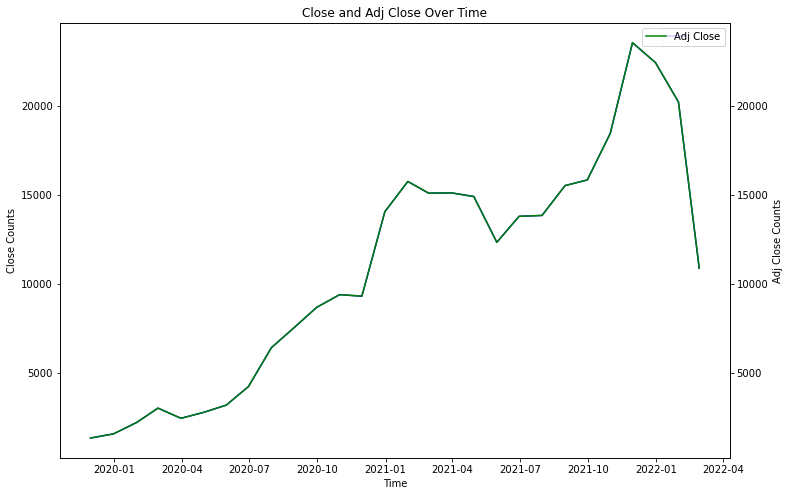

In [73]:
plot_multiples('Close', 'Adj Close', tesla_m[113:])

Close price and the adjusted close price are the same in Tesla stocks. 

Does that mean there are no dividends, stock splits or new stock offerings which brings the adjusted closing value down? 

Is it that reliability that attracks investors which have increased its stock values in the recent 2 years?

### Visualize the highest and lowest sales for the last 6 months

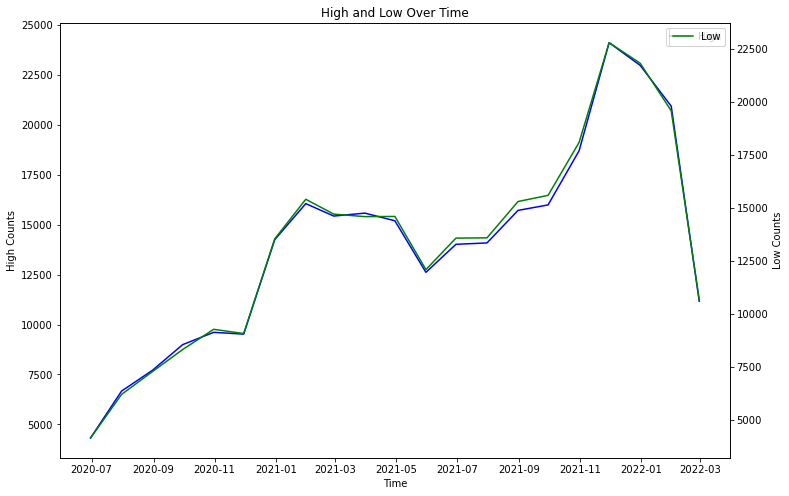

In [74]:
plot_multiples('High', 'Low', tesla_m[120:])

## Data Modeling

### Data Splitting

Because we have to change date type to an integer for data modeling, a copy of tesla is used to ensure original data stays the same.

In [75]:
tesla_c = tesla.copy()

In [76]:
tesla_c.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

#### Turning Date Column to Integers

In [77]:
tesla_c['Date'] = tesla_c['Date'].apply(lambda x: x.toordinal())

In [78]:
# Checking datatypes
tesla_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2931 non-null   int64  
 1   Open       2931 non-null   float64
 2   High       2931 non-null   float64
 3   Low        2931 non-null   float64
 4   Close      2931 non-null   float64
 5   Adj Close  2931 non-null   float64
 6   Volume     2931 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 160.4 KB


In [79]:
features = tesla_c.drop('Adj Close', axis = 1)
target = tesla_c['Adj Close']

In [80]:
features.head()

,Date,Open,High,Low,Close,Volume
0,733952,3.800,5.000,3.508,4.778,93831500
1,733953,5.158,6.084,4.660,4.766,85935500
2,733954,5.000,5.184,4.054,4.392,41094000
3,733955,4.600,4.620,3.742,3.840,25699000
4,733959,4.000,4.000,3.166,3.222,34334500


In [81]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3)

In [82]:
features_train.shape, target_train.shape,features_test.shape,  target_test.shape

((2051, 6), (2051,), (880, 6), (880,))

In [83]:
len(tesla), len(tesla)*.7

(2931, 2051.7)

### Training, Fitting and Scoring the model


#### Training and scoring with RandomForestRegressor

In [84]:
rf_model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

In [85]:
rf_model.fit(features_train, target_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [86]:
# Scoring the model for test data and all data
preds = rf_model.predict(features_test)
all_preds = rf_model.predict(features)

In [87]:
mean_absolute_error(target_test, preds)

0.6705753358409212

#### Having the first 70% of Data asTraining and Last 30% as Testing

In [88]:
len(tesla_c)*.7

2051.7

In [89]:
# Understanding the last record of training data set
tesla[2049:2050]

,Date,Open,High,Low,Close,Adj Close,Volume
2049,2018-08-17,64.699997,65.353996,60.706001,61.099998,61.099998,94793000


In [90]:
train = tesla_c[:2051]
test = tesla_c[2051:]

In [91]:
train_x, train_y = train.drop('Date', axis = 1), train['Date']
test_x, test_y = test.drop('Date', axis  =1), test['Date']

In [92]:
# Fitting the RandomForestRegressor model to the newly split data
rf_model.fit(train_x, train_y)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [93]:
x_preds = rf_model.predict(test_x)

In [94]:
mean_absolute_error(target_test, x_preds)

736291.8272457353

The difference of mean_absolute_error (MAE) in the case where 70% of random selected data were chosen as training vs first 70% of data as training is vast (0.559 to 736307.33). 

Looking at the data changes over the years, its evident the pattern how the stock changed at the beginning until 2018-08 is completely different than how it is at the end. That would explain such high MAE in the 2nd example. Therefore, we can eliminate this type of data split for project evaluation.

#### Hyperparameter Tuning and Training Model with Best Parameters

In [95]:
grid = {'n_estimators': np.arange(10,100,10),
       'max_depth': [None, 3,5,10],
       'min_samples_split': np.arange(2,20,2),
       'min_samples_leaf': np.arange(1,20,2),
        'max_features': [0.5, 1, 'sqrt', 'auto']}

# Initiate RandomizedSeachCV

grid_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                     random_state = 42), 
                               param_distributions = grid, 
                               n_iter = 10, 
                               cv = 5, 
                 
                                verbose = True)
grid_model.fit(features_train, target_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [96]:
# Finding best parameters
grid_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 1,
 'max_depth': None}

In [97]:
# Assigning the parameters to the model
best_model = RandomForestRegressor(n_estimators= 30,
                                   min_samples_split= 6,
                                   min_samples_leaf = 3,
                                   max_features = 0.5,
                                   max_depth= None)

#### Calculating MAE for All Models

In [98]:
# Dictionary to hold the mean_absolute_error of all models.
model_scores = {}

#Dictionary to hold all predicted values for the entire dataset
all_predictions = {}

def score_models(x_train, x_test, y_train, y_test, X):
    '''
    Find the mean_absolute_error of true data and predicted data on a chosen model.
    '''
    np.random.seed(42)
    models = {'RandomForestRegressor': RandomForestRegressor(),
              'Tuned RandomForest' : best_model,
              'TweedieRegressor': TweedieRegressor(max_iter=200),
              'Ridge Model': linear_model.Ridge()
             }
    for name, model in models.items():
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        model_scores[name] = mean_absolute_error(y_test, preds)
        all_predictions[name] = model.predict(X)
    
    return model_scores
    

In [99]:
# Getting MAE Scores
score_models(features_train, features_test, target_train, target_test, features)

{'RandomForestRegressor': 0.6705753358409225,
 'Tuned RandomForest': 1.172452096533737,
 'TweedieRegressor': 0.4492202265747617,
 'Ridge Model': 5.632663935441888e-05}

Looking at the mean_absolute_error, it is evident that Linear Model most rescembles the actual adj close data.

And it is clear that the predictions made in the original model resembles more of the actual data than the supposably the best predictions. To improve the supposably the best model, additional parameters could be considered when parameter tuning. 

In [100]:
# Viewing the predictions made by all models
all_predictions

{'RandomForestRegressor': array([  4.75808   ,   4.76982   ,   4.39544   , ..., 877.48580709,
        920.36569717, 902.56219703]),
 'Tuned RandomForest': array([  4.40658899,   4.76179614,   4.40511747, ..., 879.62938035,
        919.86610311, 905.41087589]),
 'TweedieRegressor': array([  5.44009874,   5.59376167,   4.68832699, ..., 878.97537277,
        921.66062657, 904.17538634]),
 'Ridge Model': array([  4.77801281,   4.7660465 ,   4.39200704, ..., 875.76045806,
        922.42971632, 902.00016577])}

#### Turning the Dictionary of Predictions to a DataFrame

In [101]:
predictions = pd.DataFrame.from_dict(all_predictions)

# Add the date column and the actual Adj Close columns 
predictions.insert(0, 'Date', tesla['Date'])
predictions.insert(1, 'Adj Close', tesla['Adj Close'])
predictions.head(20)

,Date,Adj Close,RandomForestRegressor,Tuned RandomForest,TweedieRegressor,Ridge Model
0,2010-06-29,4.778,4.75808,4.406589,5.440099,4.778013
1,2010-06-30,4.766,4.76982,4.761796,5.593762,4.766047
2,2010-07-01,4.392,4.39544,4.405117,4.688327,4.392007
3,2010-07-02,3.840,3.81252,3.895262,4.052247,3.840007
4,2010-07-06,3.222,3.32932,3.491057,3.501827,3.222009
5,2010-07-07,3.160,3.24820,3.428984,3.439002,3.160003
6,2010-07-08,3.492,3.41166,3.451701,3.795838,3.492002
7,2010-07-09,3.480,3.48618,3.475159,3.658799,3.480000
8,2010-07-12,3.410,3.46504,3.474908,3.552134,3.410002
9,2010-07-13,3.628,3.60902,3.578590,3.774628,3.628001


<Figure size 1080x576 with 0 Axes>

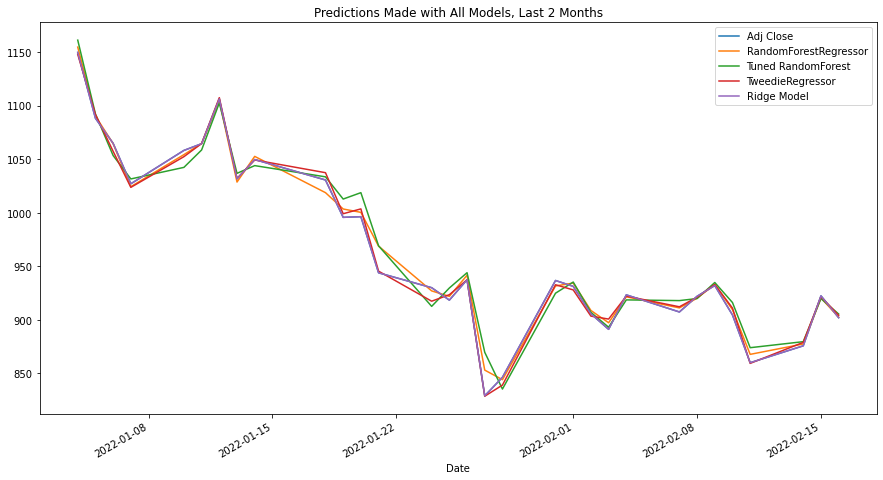

In [102]:
plt.figure(figsize = (15,8))
predictions[2900:].plot('Date', figsize = (15,8))
plt.title('Predictions Made with All Models, Last 2 Months');

<Figure size 1080x576 with 0 Axes>

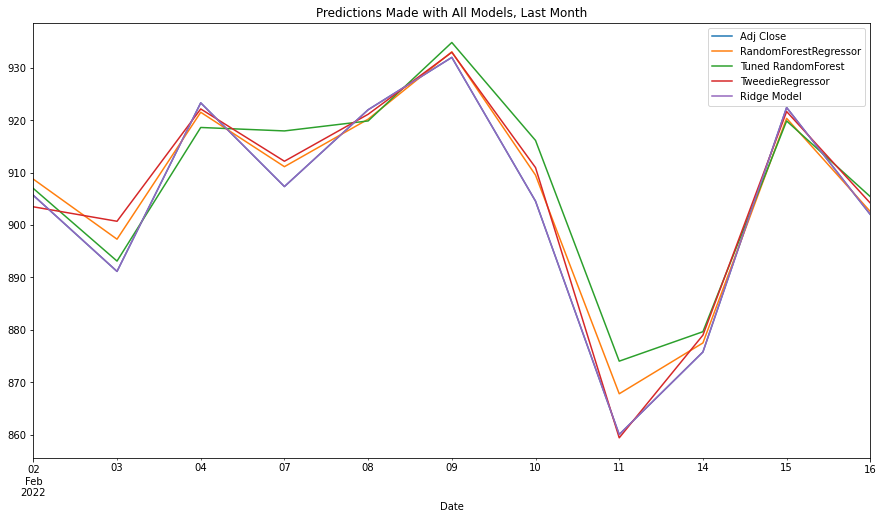

In [103]:
plt.figure(figsize = (15,8))
predictions[2920:].plot('Date', figsize = (15,8))
plt.title('Predictions Made with All Models, Last Month');

Looking at the graph, of all the models chose, Linear Model make the best predictions.

Looking at the plot, it is clear that the predictions made in the original RandomForestRegressor model resembles more of the actual data than the supposably the best predictions. 

To improve the supposably the best model, additional parameters could be considered when parameter tuningEven though RandomForestRegressor may still be a good model, we can try to improve the model by trying different parameters and tuning the model to find the best params for the dataset.
